# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_demo = pd.read_csv('./demo01.csv')
df_demo.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [16]:
df_demo.shape

(16650, 16)

In [6]:
df_demo.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [7]:
df_demo.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [10]:
df_demo.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [14]:
df_demo.mau.value_counts()

False    16260
True       390
Name: mau, dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [56]:
demo_cat = {
    'tipo_de_dado': ['object', 'object', 'object', 'int64', 'object', 'object', 'object', 
                     'object', 'float64', 'float64', 'int64', 'int64', 'int64', 'int64', 
                     'float64', 'bool'],
    'coluna': ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 
               'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 
               'possui_celular', 'possui_fone_comercial', 'possui_fone', 'possui_email', 
               'qt_pessoas_residencia', 'mau']}

df_demo_cat = pd.DataFrame(demo_cat)
df_demo_cat

,tipo de dado,coluna
0,object,sexo
1,object,posse_de_veiculo
2,object,posse_de_imovel
3,int64,qtd_filhos
4,object,tipo_renda
5,object,educacao
6,object,estado_civil
7,object,tipo_residencia
8,float64,idade
9,float64,tempo_emprego


In [59]:
lista_qnt = []
for c in df_demo.columns:
    cat = df_demo[c].unique()
    lista_qnt.append(len(cat))
lista_qnt

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]

In [58]:
df_demo_cat['qtd_categorias'] = lista
df_demo_cat

,tipo de dado,coluna,qtd_categorias
0,object,sexo,2
1,object,posse_de_veiculo,2
2,object,posse_de_imovel,2
3,int64,qtd_filhos,8
4,object,tipo_renda,5
5,object,educacao,5
6,object,estado_civil,5
7,object,tipo_residencia,6
8,float64,idade,5298
9,float64,tempo_emprego,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [62]:
df_demo.mau = df_demo.mau.astype(int)

In [66]:
df_demo = pd.get_dummies(df_demo, columns=['tipo_residencia','estado_civil', 'educacao', 'tipo_renda'], drop_first=True)

In [68]:
df_demo.posse_de_imovel = df_demo.posse_de_imovel.map({'Y': 1, 'N':0})
df_demo.posse_de_veiculo = df_demo.posse_de_veiculo.map({'Y': 1, 'N':0})
df_demo.sexo = df_demo.sexo.map({'F': 1, 'M':0})

In [ ]:
df_demo.dtypes

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

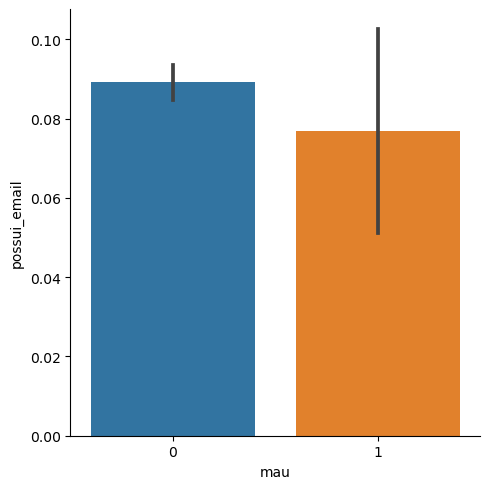

In [91]:
sns.catplot(x='mau'
            , y='possui_email'
            , kind='bar'
            , data=df_demo
           )

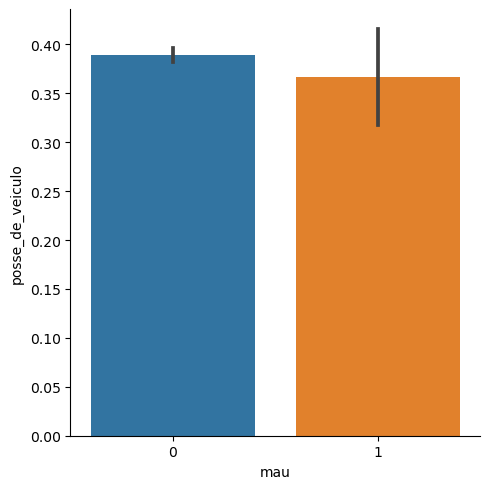

In [89]:
sns.catplot(x='mau'
            , y='posse_de_veiculo'
            , kind='bar'
            , data=df_demo
           )

##Insight
Conseguimos analisar que a uma diferença maior entre os 'maus pagadores' que possuem email e os que possuem veículos, os clientes que não possuem email tem uma proporção maior de não pagadores, o que nos leva a acreditar que clientes que não possuem email são mais relevantes para a nossa análise.

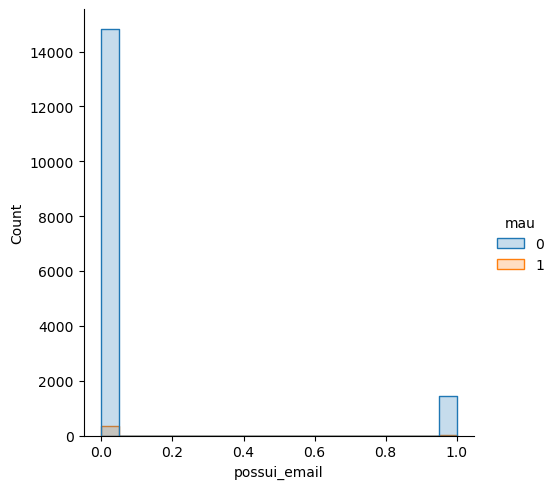

In [97]:
# histograma com covariáveis
sns.displot(data = df_demo
            ,x = 'possui_email'
            ,hue = 'mau'
            ,bins = 20
            ,element = 'step'
           )

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [104]:
df_demo['possui_email'].loc[df_demo['mau'] == 1].value_counts()


0    360
1     30
Name: possui_email, dtype: int64

In [105]:
df_demo['possui_email'].value_counts()

0    15170
1     1480
Name: possui_email, dtype: int64

In [103]:
df_demo.to_csv('./demo02.csv', index= False, sep=';', decimal=',')